# EDA on RealEstate Data

## Mount Storage

In [0]:
# dbutils.fs.mount(
#   source = "wasbs://inputdata@realestatehexa.blob.core.windows.net",
#   mount_point = "/mnt/sample/realestate",
#   extra_configs = {"fs.azure.account.key.realestatehexa.blob.core.windows.net":"JfWT0BED8GvLWJtX46CL0ixm8kzMYMVcPSJ8Oc7oypZspQp81OQVy+DIjHU5lV7J33+Y85aQwiej+ASt0EIU0w=="})


True

## Extract

In [0]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("ETL pipeline").getOrCreate()

# Define the file path
file_path = "/mnt/sample/realestate/RealEstate.csv"

# Read the CSV file
df = spark.read.csv(file_path, header=True, inferSchema=True)


In [0]:
df.limit(10).display()

Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,null,null,null,null,null
20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,null,null,null,null
200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,null,null,null,null
200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,null,null,null,null
200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,null,null,null,null
200109,2020,2020-12-09,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,0.678,Residential,Single Family,null,null,null,null
2020180,2020,2021-03-01,Berlin,1539 FARMINGTON AVE,234200.0,130000.0,1.8015,Residential,Two Family,08 - Part Interest,null,null,null
2020313,2020,2021-07-01,Berlin,216 WATCH HILL RD,412000.0,677500.0,0.6081,Residential,Single Family,null,null,null,null
200097,2020,2021-06-04,Bethany,23 AMITY RD,511000.0,795000.0,0.6427,Commercial,null,null,null,null,null
20139,2020,2020-12-16,Bethel,16 DEEPWOOD DRIVE,171360.0,335000.0,0.5115,Residential,Single Family,null,null,null,null


stop running here.

## EDA Analysis

In [0]:
%pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


### Missing number matrix

<Axes: >

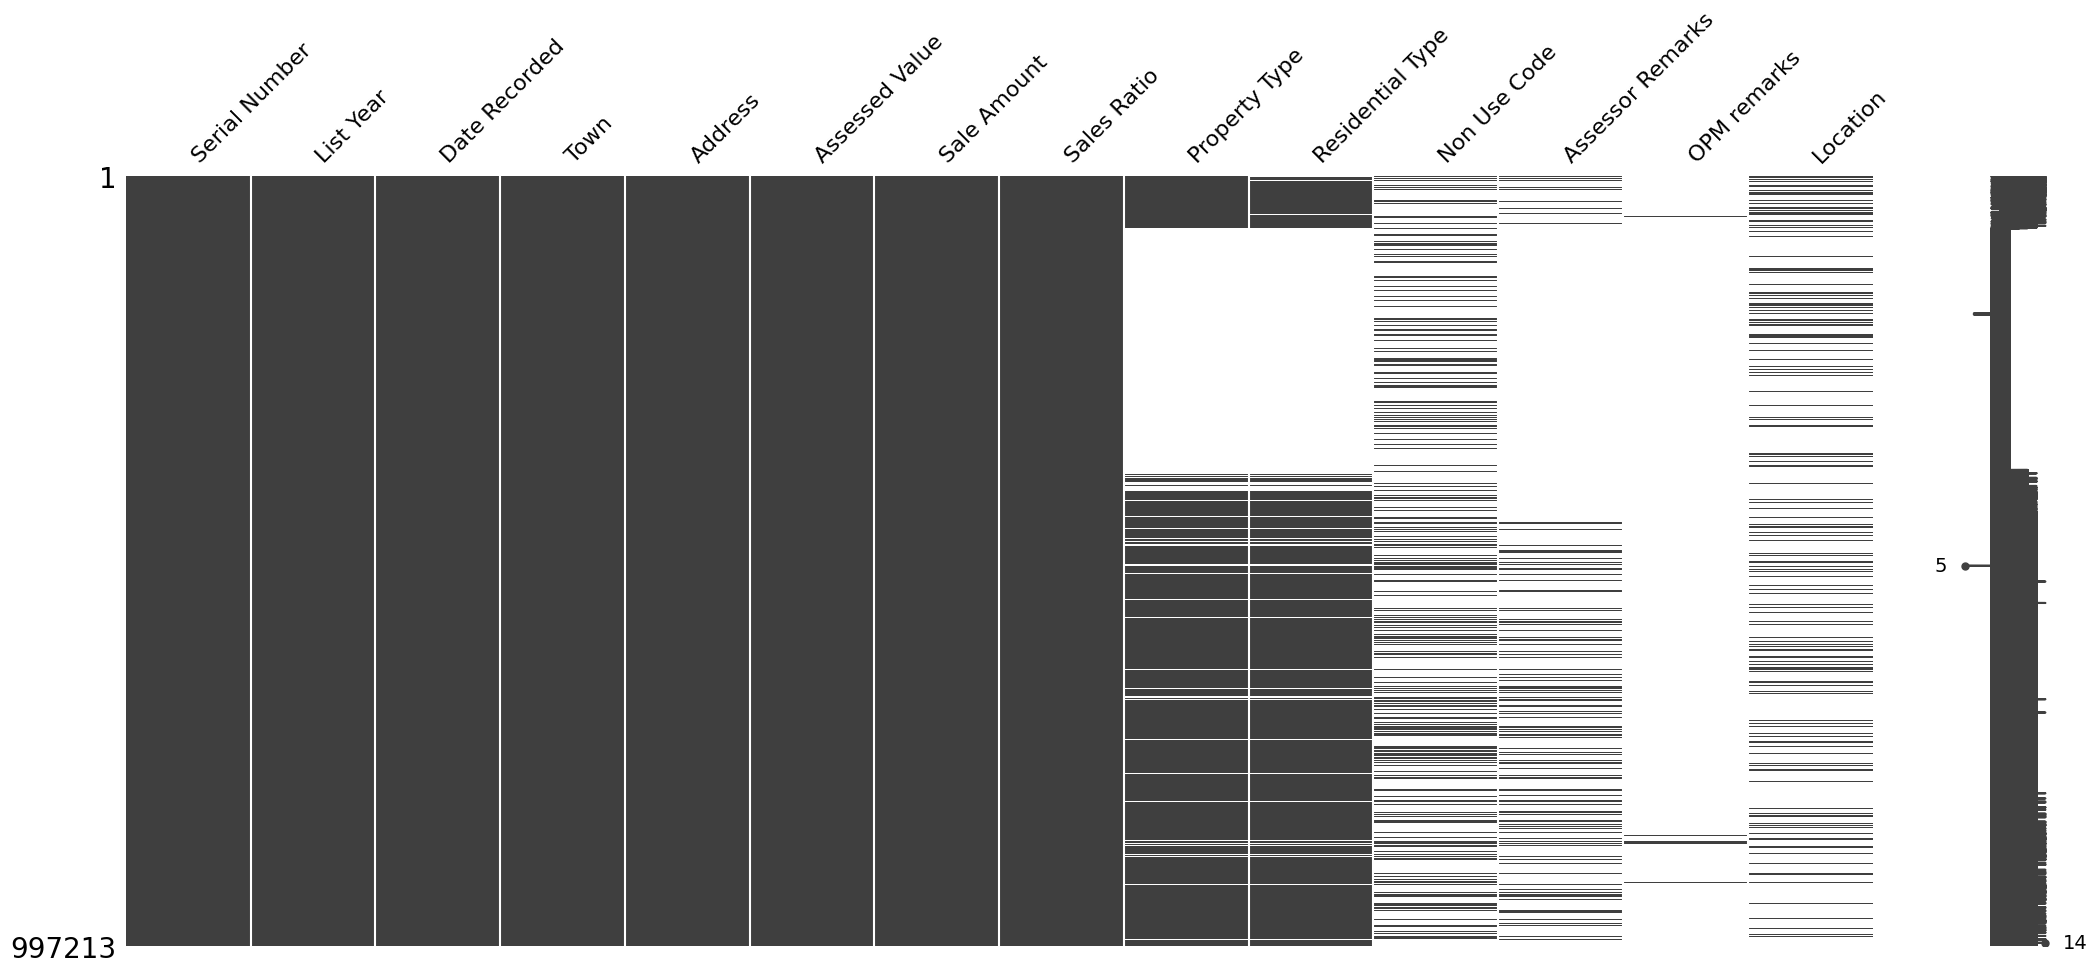

In [0]:
import missingno as msno

# Convert PySpark DataFrame to pandas DataFrame
df_pandas = df.toPandas()

# Use missingno to visualize missing data
msno.matrix(df_pandas)


In [0]:
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Print the first few rows of the DataFrame
print(df.show(5))  # Display the first 5 rows in a tabular format


+-------------+---------+-------------+-------+--------------------+--------------+-----------+-----------+-------------+----------------+------------+----------------+-----------+--------+
|Serial Number|List Year|Date Recorded|   Town|             Address|Assessed Value|Sale Amount|Sales Ratio|Property Type|Residential Type|Non Use Code|Assessor Remarks|OPM remarks|Location|
+-------------+---------+-------------+-------+--------------------+--------------+-----------+-----------+-------------+----------------+------------+----------------+-----------+--------+
|      2020348|     2020|   2021-09-13|Ansonia|     230 WAKELEE AVE|      150500.0|   325000.0|      0.463|   Commercial|            NULL|        NULL|            NULL|       NULL|    NULL|
|        20002|     2020|   2020-10-02|Ashford|     390 TURNPIKE RD|      253000.0|   430000.0|     0.5883|  Residential|   Single Family|        NULL|            NULL|       NULL|    NULL|
|       200212|     2020|   2021-03-09|   Avon|   

### Detailed view on metadata

In [0]:
# Print schema of the DataFrame (data types of each column)
print("Schema of the DataFrame:")
df.printSchema()

# Count the number of rows and columns
print("\nNumber of rows and columns:")
print(f"Rows: {df.count()}, Columns: {len(df.columns)}")

# Count non-null values in each column
print("\nNumber of non-null values in each column:")
non_null_counts = df.select(
    [(df[col].isNotNull().cast("int").alias(col)) for col in df.columns]
).groupBy().sum().collect()[0]
for col, non_null_count in zip(df.columns, non_null_counts):
    print(f"{col}: {non_null_count} non-null values")

# Display column data types
print("\nColumn data types:")
for col, dtype in df.dtypes:
    print(f"{col}: {dtype}")


Schema of the DataFrame:
root
 |-- Serial Number: integer (nullable = true)
 |-- List Year: integer (nullable = true)
 |-- Date Recorded: date (nullable = true)
 |-- Town: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Assessed Value: double (nullable = true)
 |-- Sale Amount: double (nullable = true)
 |-- Sales Ratio: double (nullable = true)
 |-- Property Type: string (nullable = true)
 |-- Residential Type: string (nullable = true)
 |-- Non Use Code: string (nullable = true)
 |-- Assessor Remarks: string (nullable = true)
 |-- OPM remarks: string (nullable = true)
 |-- Location: string (nullable = true)


Number of rows and columns:
Rows: 997213, Columns: 14

Number of non-null values in each column:
Serial Number: 997213 non-null values
List Year: 997213 non-null values
Date Recorded: 997211 non-null values
Town: 997213 non-null values
Address: 997162 non-null values
Assessed Value: 997212 non-null values
Sale Amount: 997212 non-null values
Sales Ratio: 997212

### Descriptive Statistics

In [0]:
# Compute summary statistics
print("Summary statistics:")
df.describe().show()


Summary statistics:
+-------+------------------+------------------+-------------+--------------------+------------------+------------------+------------------+-------------+----------------+-----------------+--------------------+--------------------+--------------------+
|summary|     Serial Number|         List Year|         Town|             Address|    Assessed Value|       Sale Amount|       Sales Ratio|Property Type|Residential Type|     Non Use Code|    Assessor Remarks|         OPM remarks|            Location|
+-------+------------------+------------------+-------------+--------------------+------------------+------------------+------------------+-------------+----------------+-----------------+--------------------+--------------------+--------------------+
|  count|            997213|            997213|       997213|              997162|            997212|            997212|            997212|       614766|          608903|           289681|              149870|               

### Distribution of sale amount

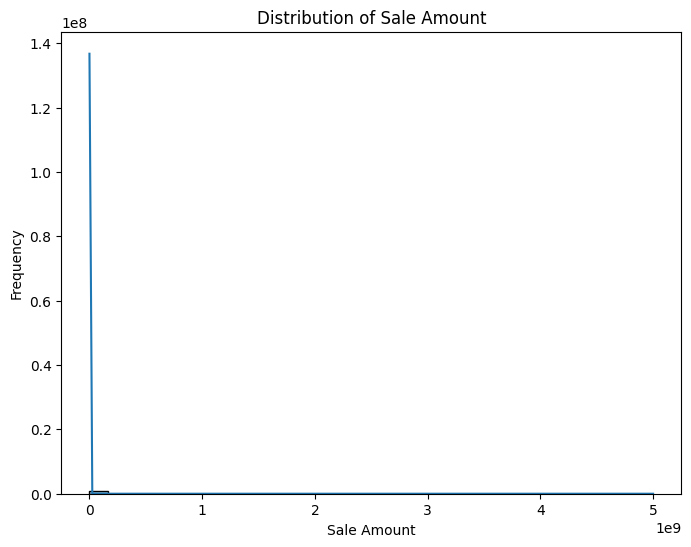

In [0]:
from pyspark.sql.functions import col
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Collect the data to Pandas for visualization
pandas_df = df.select('Sale Amount').toPandas()

# Plot histogram using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
sns.histplot(pandas_df['Sale Amount'], bins=30, kde=True)
plt.title("Distribution of Sale Amount")
plt.xlabel("Sale Amount")
plt.ylabel("Frequency")
plt.show()


### Sale ration by property type

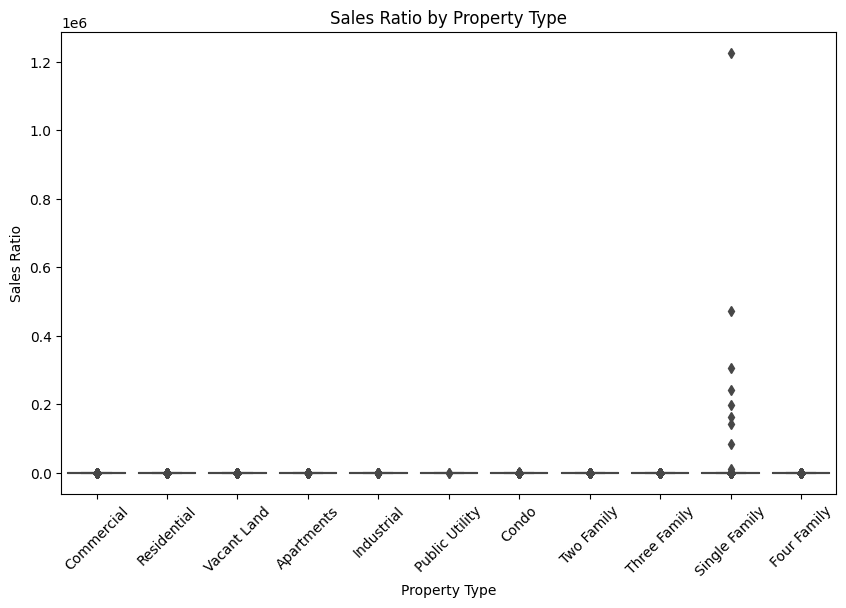

In [0]:
from pyspark.sql.functions import col
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Collect the necessary columns for visualization
pandas_df = df.select('Property Type', 'Sales Ratio').toPandas()

# Plot the box plot using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property Type', y='Sales Ratio', data=pandas_df)
plt.title("Sales Ratio by Property Type")
plt.xticks(rotation=45)
plt.show()


Residential type distribution

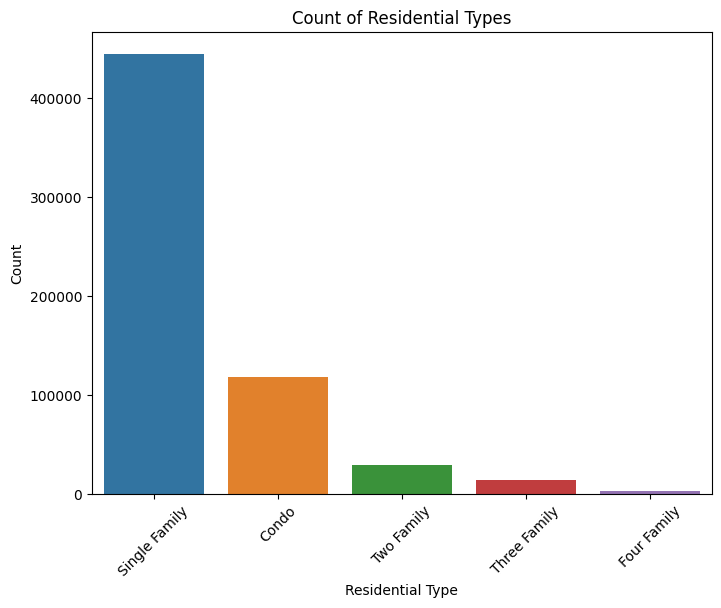

In [0]:
from pyspark.sql.functions import col
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Collect the 'Residential Type' column for visualization
pandas_df = df.select('Residential Type').toPandas()

# Plot the count plot using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
sns.countplot(x='Residential Type', data=pandas_df)
plt.title("Count of Residential Types")
plt.xticks(rotation=45)
plt.xlabel("Residential Type")
plt.ylabel("Count")
plt.show()


In [0]:
from pyspark.sql.functions import col
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType

# Select only numeric columns
numeric_data = df.select([col(c).cast('double') for c in df.columns if df.schema[c].dataType.typeName() in ['int', 'double']])

# Convert "Date Recorded" to datetime format
df = df.withColumn('Date Recorded', F.to_date(col('Date Recorded'), 'yyyy-MM-dd'))

# Extract year and month as numeric features
df = df.withColumn('Year Recorded', F.year(col('Date Recorded')).cast(IntegerType()))
df = df.withColumn('Month Recorded', F.month(col('Date Recorded')).cast(IntegerType()))

# Select numeric columns including the new datetime columns
numeric_data_with_dates = df.select('Year Recorded', 'Month Recorded', *numeric_data.columns)

# Compute the correlation matrix
correlation_matrix_with_dates = numeric_data_with_dates.toPandas().corr()

correlation_matrix_with_dates


,Year Recorded,Month Recorded,Assessed Value,Sale Amount,Sales Ratio
Year Recorded,1.000000,-0.032284,0.030237,0.010067,-0.003229
Month Recorded,-0.032284,1.000000,0.000790,0.001841,-0.001088
Assessed Value,0.030237,0.000790,1.000000,0.110962,0.003943
Sale Amount,0.010067,0.001841,0.110962,1.000000,-0.000377
Sales Ratio,-0.003229,-0.001088,0.003943,-0.000377,1.000000


### Real Estate Sales Over the years

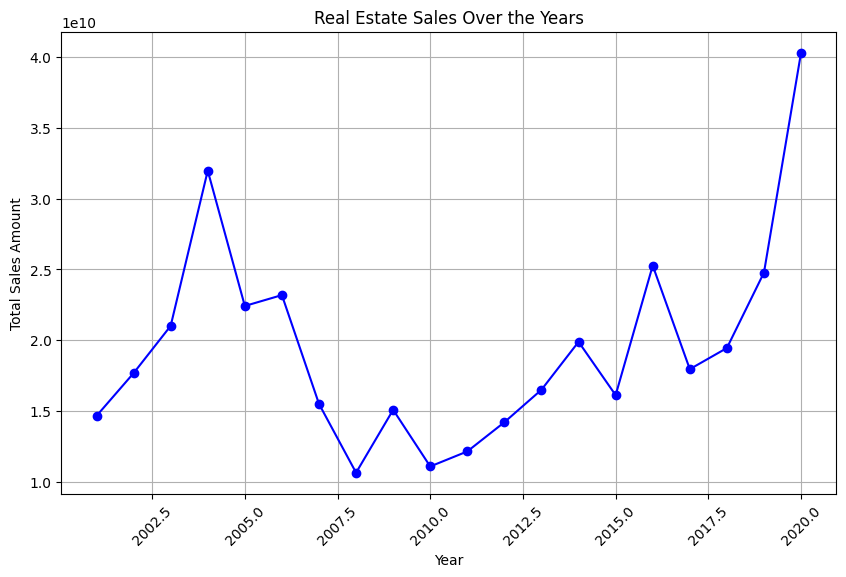

In [0]:
from pyspark.sql.functions import col
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'List Year' and sum 'Sale Amount'
sales_over_years = df.groupBy('List Year').agg({'Sale Amount': 'sum'}).withColumnRenamed('sum(Sale Amount)', 'Total Sales Amount').orderBy('List Year')

# Convert to Pandas for visualization
sales_over_years_pandas = sales_over_years.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sales_over_years_pandas['List Year'], sales_over_years_pandas['Total Sales Amount'], marker='o', linestyle='-', color='b')
plt.title('Real Estate Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()
